## Project Definiion

To predict the programs our user are likely to enjoy and make recommendations based on the prediction

## Data Description


ViewsID	 	- a unique identifier for each view entry
CustomerID 		- the customer’s ID
Name 			- the customer’s name
State 			- the customer’s state of residence
Age 			- the customer’s age
Gender 		- the customer’s gender
Genre 		- the genre of the program
Format 		- the format of the program
Device 		- the medium used to view the program
Viewing_Frequency     - the number of views per week
Total_Viewing_Time    - the total viewing time in seconds view per week
Rating 		          - the customer’s rating of the program
Duration		      - the duration of the subscription in months
Plan	 		     -  the subscription plan
Monthly_Cost	      - the cost of subscription per month



In [2]:
##Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
 ##Loading the Data
TvData = pd.read_csv('data/MavTv.csv')
TvData.head()

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating
0,1,Jelani Sofoluwe,35,Male,Akwa,Religion,TV-Shows,Decoder,4,72777,Basic,2500,4,4
1,2,Lee Balarabe,66,Male,Jigawa,Comedy,Live-Events,Tv-App,5,251472,Premium,5000,1,2
2,3,Lawrence Akinde,64,Male,Plateau,Comedy,TV-Shows,Tv-App,11,137732,Premium,5000,3,4
3,4,Freya Ajudua,58,Male,Niger,Sports,TV-Shows,Tv-App,2,105950,Elite,10000,12,2
4,5,Declan Ujah,57,Male,Akwa,Music,Live-Events,Browser,7,464270,Premium,5000,2,3


In [4]:
TvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          5000 non-null   int64 
 1   Name                5000 non-null   object
 2   Age                 5000 non-null   int64 
 3   Gender              5000 non-null   object
 4   State               5000 non-null   object
 5   Genre               5000 non-null   object
 6   Format              5000 non-null   object
 7   Device              5000 non-null   object
 8   Viewing_Frequency   5000 non-null   int64 
 9   Total_Viewing_Time  5000 non-null   int64 
 10  Plan                5000 non-null   object
 11  Monthly_Cost        5000 non-null   int64 
 12  Duration            5000 non-null   int64 
 13  Rating              5000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 547.0+ KB


In [5]:
TvData.isna().count()

CustomerID            5000
Name                  5000
Age                   5000
Gender                5000
State                 5000
Genre                 5000
Format                5000
Device                5000
Viewing_Frequency     5000
Total_Viewing_Time    5000
Plan                  5000
Monthly_Cost          5000
Duration              5000
Rating                5000
dtype: int64

In [6]:
TvData.describe()

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1495.723800,46.620600,5.479800,298835.144000,5629.500000,6.471800,3.013200
std,867.395992,16.568209,3.214227,177674.372424,2713.199595,3.150808,1.234071
min,1.000000,18.000000,0.000000,6.000000,2500.000000,1.000000,1.000000
25%,741.750000,32.000000,3.000000,140919.500000,5000.000000,4.000000,2.000000
50%,1495.000000,47.000000,5.000000,295446.500000,5000.000000,6.000000,3.000000
75%,2250.000000,61.000000,8.000000,454118.250000,5000.000000,9.000000,4.000000
max,3000.000000,75.000000,11.000000,604790.000000,10000.000000,12.000000,5.000000


In [7]:
TvData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

## Exploratory Data Analysis

In [8]:
TvData.CustomerID.count()

5000

In [9]:
TV1 = TvData.corr()
TV1

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
CustomerID,1.000000,-0.028073,0.031927,-0.010078,0.032878,0.020340,-0.027107
Age,-0.028073,1.000000,-0.010386,0.000425,-0.030219,0.007062,-0.000469
Viewing_Frequency,0.031927,-0.010386,1.000000,0.012130,0.009114,-0.000748,-0.027569
Total_Viewing_Time,-0.010078,0.000425,0.012130,1.000000,-0.005683,-0.007429,0.005381
Monthly_Cost,0.032878,-0.030219,0.009114,-0.005683,1.000000,0.004154,0.022610
Duration,0.020340,0.007062,-0.000748,-0.007429,0.004154,1.000000,-0.012817
Rating,-0.027107,-0.000469,-0.027569,0.005381,0.022610,-0.012817,1.000000


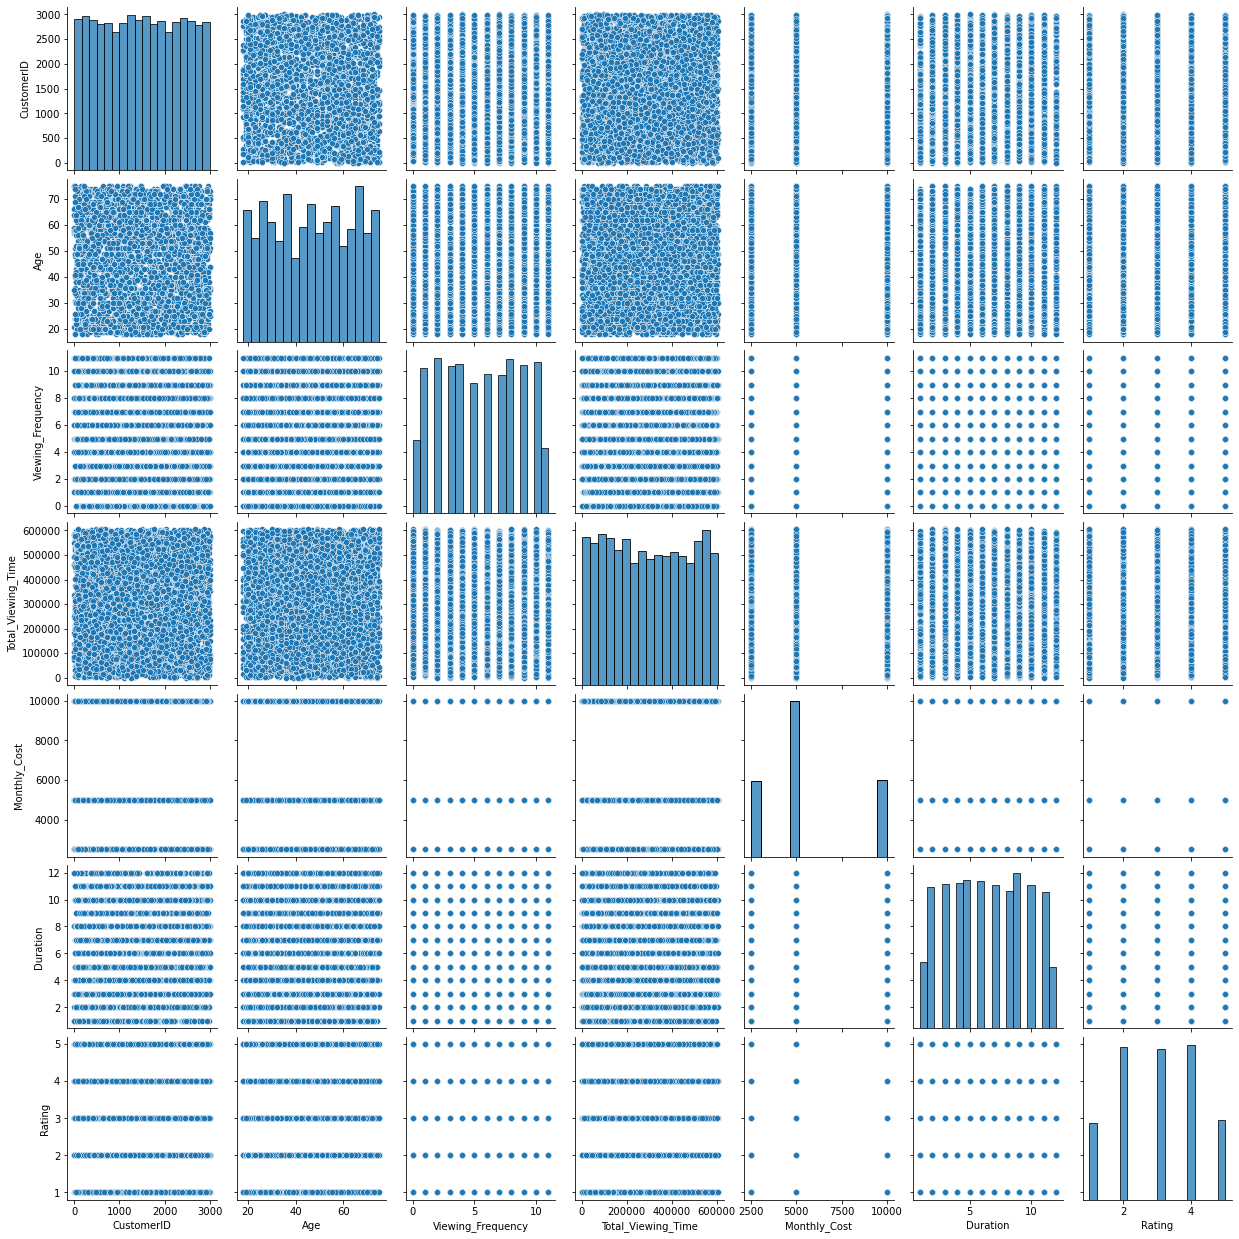

In [10]:
sb.pairplot(TvData)

<AxesSubplot:>

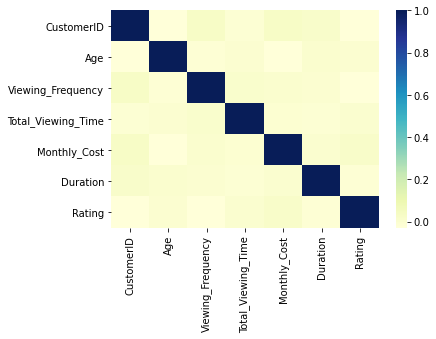

In [11]:
sb.heatmap(TV1, cmap = 'YlGnBu')

In [12]:
TvData.Age.count()

5000

In [13]:
# from scipy.stats import boxcox
# btr, lmbda = boxcox(TvData['Rating'])
# print(btr)
# print(lmbda)
# # sb.distplot(btr, kde=True)

In [14]:
# sb.histplot(btr, kde=True)

In [15]:
# TvData.Rating.hist()
# sb.distplot(TvData.Rating, kde=True)

In [16]:
TvData.Device.value_counts()


Decoder       1676
Tv-App        1670
Browser        844
Mobile-App     810
Name: Device, dtype: int64

In [17]:
TvData.Plan.value_counts()

Premium    2527
Elite      1244
Basic      1229
Name: Plan, dtype: int64

In [18]:
TvData.Viewing_Frequency.value_counts()

2     486
8     484
10    472
4     467
9     465
3     462
1     454
6     436
7     433
5     408
0     228
11    205
Name: Viewing_Frequency, dtype: int64

In [19]:
TvData.Total_Viewing_Time.value_counts()

387232    2
176633    2
517318    2
114959    2
26279     2
         ..
256736    1
560447    1
130369    1
559597    1
8192      1
Name: Total_Viewing_Time, Length: 4982, dtype: int64

In [20]:
TvData[['Rating','Genre']].groupby('Genre').count()

,Rating
Genre,
Action,439
Cartoons,452
Comedy,916
Documentaries,440
Drama,247
Music,447
News,457
Reality,456
Religion,208


In [21]:
TvData[['Device','Genre']].groupby('Genre').count()

,Device
Genre,
Action,439
Cartoons,452
Comedy,916
Documentaries,440
Drama,247
Music,447
News,457
Reality,456
Religion,208


# Data Preprocessing

## Feature Engineering

In [22]:
TvData.Age.min()

18

In [23]:
bins = [18,31,49,60,125]
labels = ["Young_Adult","Middle_Aged","Old_Adult","Elderly"]
TvData["Age_Group"] = pd.cut(TvData["Age"], bins = bins ,labels = labels, right = False)

In [24]:
# TvData.sample(20)

In [25]:
TvData.drop(['Age', 'Name', 'CustomerID', 'Monthly_Cost'], axis=1, inplace=True)

In [26]:
TvData.sample(5)

,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Duration,Rating,Age_Group
3293,Female,Kwara,Drama,Live-Events,Tv-App,6,168645,Basic,8,4,Elderly
78,Male,Kogi,Comedy,Live-Events,Tv-App,11,469054,Premium,10,2,Elderly
1132,Male,Kogi,News,Live-Events,Decoder,3,429731,Elite,8,4,Young_Adult
2032,Female,Ondo,Documentaries,TV-Shows,Decoder,5,8332,Premium,6,3,Elderly
4241,Male,Rivers,News,Live-Events,Browser,5,567097,Premium,1,4,Middle_Aged


In [27]:
TvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              5000 non-null   object  
 1   State               5000 non-null   object  
 2   Genre               5000 non-null   object  
 3   Format              5000 non-null   object  
 4   Device              5000 non-null   object  
 5   Viewing_Frequency   5000 non-null   int64   
 6   Total_Viewing_Time  5000 non-null   int64   
 7   Plan                5000 non-null   object  
 8   Duration            5000 non-null   int64   
 9   Rating              5000 non-null   int64   
 10  Age_Group           5000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 395.8+ KB


In [28]:
categorical_features=['Gender','State','Format','Device','Plan','Age_Group']
# categorical_features=['Gender','State', 'Genre','Format','Device','Plan','Age_Group']

categorical_features

['Gender', 'State', 'Format', 'Device', 'Plan', 'Age_Group']

In [29]:
numerical_features=['Rating', 'Duration', 'Total_Viewing_Time', 'Viewing_Frequency', 'Age']
# numerical_features=['Duration', 'Total_Viewing_Time', 'Viewing_Frequency', 'Age']

numerical_features

['Rating', 'Duration', 'Total_Viewing_Time', 'Viewing_Frequency', 'Age']

### Spliting Data

In [30]:
from sklearn.model_selection import train_test_split

In [40]:
# X = TvData.loc[:, TvData.columns!='Genre']
X = TvData.drop(columns = ['Genre'])
y = TvData['Genre']

# X = TvData.drop(columns = ['Rating'])
# y = TvData['Rating']

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [42]:
# y_train.value_counts()

In [43]:
# y_test.value_counts()

In [44]:
# X_train.head()

### Feature Encoding

In [45]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

In [46]:
# Encode input features
def prepare_inputs(X_train, X_test):
    X_train_enc = pd.get_dummies(X_train, columns=categorical_features)
    X_test_enc = pd.get_dummies(X_test, columns=categorical_features)
    return X_train_enc, X_test_enc

In [47]:
# Encode the target feature
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [48]:
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

X_train, X_test = prepare_inputs(X_train, X_test)
y_train, y_test = prepare_targets(y_train, y_test)

In [52]:
len(X_train.columns)


57

### Feature importance

In [53]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Use Random Forest Classifier to perform feature ranking/selection
clf_rf = RandomForestClassifier()
selector = RFE(estimator = clf_rf)

# selector = selector.fit(X_train_scaled, y_train_enc)
selector = selector.fit(X_train, y_train)

In [55]:
# print("Selected best features: ", X_train_enc.columns[selector.support_])
print("Selected best features: ", X_train.columns[selector.support_])
# selector.ranking_

Selected best features:  Index(['Viewing_Frequency', 'Total_Viewing_Time', 'Duration', 'Rating',
       'Gender_Female', 'Gender_Male', 'State_Adamawa', 'State_Akwa',
       'State_Bauchi', 'State_Benue', 'State_Ebonyi', 'State_Ibom',
       'State_Ogun', 'State_Oyo', 'State_Plateau', 'Format_Live-Events',
       'Format_TV-Shows', 'Device_Browser', 'Device_Decoder',
       'Device_Mobile-App', 'Device_Tv-App', 'Plan_Basic', 'Plan_Elite',
       'Plan_Premium', 'Age_Group_Young_Adult', 'Age_Group_Middle_Aged',
       'Age_Group_Old_Adult', 'Age_Group_Elderly'],
      dtype='object')


In [56]:
# TvData.columns

In [57]:
#  Use selected columns
# X_train = X_train[X_train.columns[selector.support_]]
# X_test = X_test[X_test.columns[selector.support_]]

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler() 

In [59]:
# X_train_scaled = scaler.fit_transform(X_train_enc)
# X_test_scaled = scaler.transform(X_test_enc)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# X_test_scaled

# Prediction

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import classification_report

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Evaluate model using classification report
def modelEval(model):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    
    print("Score: ", score)
    print(classification_report(y_test, y_pred), '\n')

In [63]:
models = [
    RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42),
    DecisionTreeClassifier(max_depth=50, random_state=42),
    LogisticRegression(solver='liblinear', random_state=42),
#     GaussianNB(),
#     XGBClassifier(n_estimators=500, max_depth=50, random_state=42),
#     LGBMClassifier(n_estimators=500, max_depth=50, random_state=42)
]

In [64]:
for model in models:
    modelEval(model)

Score:  0.1344
              precision    recall  f1-score   support

           0       0.04      0.03      0.03       110
           1       0.07      0.05      0.06       113
           2       0.17      0.48      0.26       229
           3       0.07      0.05      0.05       110
           4       0.06      0.02      0.03        62
           5       0.07      0.04      0.05       112
           6       0.16      0.09      0.11       114
           7       0.11      0.06      0.08       114
           8       0.10      0.04      0.06        52
           9       0.06      0.04      0.04       112
          10       0.16      0.12      0.14       122

    accuracy                           0.13      1250
   macro avg       0.10      0.09      0.08      1250
weighted avg       0.11      0.13      0.10      1250
 

Score:  0.1048
              precision    recall  f1-score   support

           0       0.11      0.10      0.10       110
           1       0.05      0.05      0.05   

In [65]:
# print(y_pred)

In [66]:
# print(y_test)

## Hyperparameter Tuning

In [67]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# from sklearn.linear_model import SGDClassifier

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

#### Random Forest Classifier 

In [68]:
rf_model = RandomForestClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the parameter distributions
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 50)],
               'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(start = 1, stop = 20)],
               'min_samples_split': [2, 10],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# define search
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, n_iter=20, param_distributions = param_dist, cv = cv,  n_jobs=-1)

# execute search
result = rf_RandomGrid.fit(X_train, y_train)

# summarize result
print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Train Accuracy - : 0.183
Test Accuracy - : 0.183 

Best Score: 0.1832
Best Hyperparameters: {'n_estimators': 27, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 1, 'bootstrap': False}


#### Logistic Regression Classifier

In [69]:
lr_model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the parameter distributions
param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100)
}

# define search
lr_RandomGrid = RandomizedSearchCV(estimator = lr_model, n_iter=20, param_distributions = param_dist, cv=cv,  n_jobs=-1)

# execute search
result = lr_RandomGrid.fit(X_train, y_train)

# summarize result
print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Train Accuracy - : 0.183
Test Accuracy - : 0.183 

Best Score: 0.1832
Best Hyperparameters: {'C': 0.0005240678568464427, 'penalty': 'l2', 'solver': 'lbfgs'}


### Evaluate Improved Models

In [70]:
lr_model = LogisticRegression(C = 0.011615959786172156, penalty = 'l2', solver = 'liblinear')

modelEval(lr_model)

Score:  0.1832
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       113
           2       0.18      1.00      0.31       229
           3       0.00      0.00      0.00       110
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00       112
          10       0.00      0.00      0.00       122

    accuracy                           0.18      1250
   macro avg       0.02      0.09      0.03      1250
weighted avg       0.03      0.18      0.06      1250
 



In [71]:
rf_model = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=42)

modelEval(rf_model)

Score:  0.1832
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       113
           2       0.18      1.00      0.31       229
           3       0.00      0.00      0.00       110
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00       112
          10       0.00      0.00      0.00       122

    accuracy                           0.18      1250
   macro avg       0.02      0.09      0.03      1250
weighted avg       0.03      0.18      0.06      1250
 



# Prepare Model for Deployment

In [72]:
# Import necessary libraries
import pickle

In [77]:
# Create a pickle file of model using serializtion
model_file = "classifier.pkl"

pickle_out = open(model_file, "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()